## SF Crime Data Analysis and Modeling (Spark, SQL)

The project aims to 

dataset comes from: https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry). 
The first part of this project is OLAP for scrime data analysis
The second part is unsupervised learning for spatial data analysis (20 credits). 选做  
The option part is the time series data analysis (50 credits).  选座
**Note**: you can download the small data (one month e.g. 2018-10) for debug, then download the data from 2013 to 2018 for testing and analysising. 

### How to submit the report for grading ? 
1. Publish your notebook and send your notebook link to mike@laioffer.com. 
2. Your report have to contain your data analysis insights.  
3. write a ppt to present your work （选作）

### Bonus 
1. choose different city (加10分)
2. choose different analysis question （加10分）
3. include other data together like house price, weather, news (加20分)

### Deadline 
Two weeks from the homework release date

### cluster 创建
创建cluster 的时候选择python 3  

### 画图
1. 使用Databricks 自带的画图就好了，不要求使用其他的工具
2. 如果使用其他的包，请使用display 

### Time series 
不讲，个人随意

### others
个人需要发挥主观能动性

In [0]:
# Import Package
from csv import reader
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

import os
os.environ['PYSPARK_PYTHON'] = 'python3'

In [0]:
# Read Data

## Method 1: read data from url
#import urllib.request
#urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
#dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
#display(dbutils.fs.ls('dbfs:/laioffer/spark_hw1/data/'))

## Method 2: download data 
# https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD

In [0]:
data_path = 'dbfs:/laioffer/spark_hw1/data/sf_03_18.csv'

### Solove  big data issues via Spark
approach 1: use RDD (not recommend)  
approach 2: use Dataframe, register the RDD to a dataframe (recommend for DE)  
approach 3: use SQL (recomend for data analysis or DS， 基础比较差的同学)  
***note***: you only need to choose one of approaches as introduced above

In [0]:
# Get dataframe and sql
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

## helper function to transform the date, choose your way to do it. 
## 老师我真的是操心了。。。 
# refer: https://jaceklaskowski.gitbooks.io/mastering-spark-sql/spark-sql-functions-datetime.html
# 方法1 使用系统自带udf
# from pyspark.sql.functions import to_date, to_timestamp, hour
# df_opt1 = df_opt1.withColumn('Date', to_date(df_opt1.OccurredOn, "MM/dd/yy"))
# df_opt1 = df_opt1.withColumn('Time', to_timestamp(df_opt1.OccurredOn, "MM/dd/yy HH:mm"))
# df_opt1 = df_opt1.withColumn('Hour', hour(df_opt1['Time']))
# df_opt1 = df_opt1.withColumn("DayOfWeek", date_format(df_opt1.Date, "EEEE"))

## 方法2 手工写udf 
#from pyspark.sql.functions import col, udf
#from pyspark.sql.functions import expr
#from pyspark.sql.functions import from_unixtime

#date_func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())
#month_func = udf (lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y/%m'), StringType())

#df = df_opt1.withColumn('month_year', month_func(col('Date')))\
#           .withColumn('Date_time', date_func(col('Date')))

## 方法3 手工在sql 里面
# select Date, substring(Date,7) as Year, substring(Date,1,2) as Month from sf_crime


## 方法4: 使用系统自带
# from pyspark.sql.functions import *
# df_update = df_opt1.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy")) ##change datetype from string to date
# df_update.createOrReplaceTempView("sf_crime")
# crimeYearMonth = spark.sql("SELECT Year(Date) AS Year, Month(Date) AS Month, FROM sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Fire Prevention Districts,DELETE - Police Districts,DELETE - Supervisor Districts,DELETE - Zip Codes,DELETE - Neighborhoods,DELETE - 2017 Fix It Zones,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces
146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403404791479,37.775420706711,POINT (-122.403404791479 37.775420706711),14619616171000,32,1,10,34,14,2,9,28853,34,null,null,null,null,null,null,2,null,null,null,null
150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.48560378101,37.7388214326705,POINT (-122.48560378101 37.7388214326705),15004567504134,40,10,7,35,1,8,3,29491,35,null,null,null,null,null,null,1,null,null,null,null
140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535107224,37.7106603302503,POINT (-122.396535107224 37.7106603302503),14063202264085,89,2,9,1,10,3,8,309,1,null,null,null,null,null,null,1,null,null,null,null
150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400130573297,37.7300925390327,POINT (-122.400130573297 37.7300925390327),15038325904134,87,2,9,1,10,3,8,58,1,null,null,null,null,null,null,2,null,null,null,null
040753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.5,90,POINT (-120.5 90),4075398065020,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
040855122,SUICIDE,SUICIDE BY JUMPING,Tuesday,07/27/2004,15:19,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.386667033903 37.7898821569191),4085512260170,null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null
066085191,NON-CRIMINAL,LOST PROPERTY,Sunday,11/19/2006,17:45,BAYVIEW,NONE,0 Block of GIANTS DR,-122.38750147945,37.716878646429,POINT (-122.38750147945 37.716878646429),6608519171000,88,2,9,1,10,3,8,58,1,null,null,null,null,null,null,2,null,null,null,null
050908404,VEHICLE THEFT,STOLEN AUTOMOBILE,Saturday,08/13/2005,17:00,TENDERLOIN,NONE,JENNINGS CT / INGALLS ST,-120.5,90,POINT (-120.5 90),5090840407021,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
090768064,ARSON,ARSON OF A VEHICLE,Tuesday,07/28/2009,23:26,BAYVIEW,NONE,SELBY ST / OAKDALE AV,-122.399686082806,37.739901780585,POINT (-122.399686082806 37.739901780585),9076806426031,87,2,9,1,10,3,8,58,1,null,null,null,null,null,null,2,null,null,null,null
111027676,ASSAULT,BATTERY,Saturday,12/24/2011,07:00,SOUTHERN,NONE,0 Block of DORE ST,-122.412933062384,37.7739274524819,POINT (-122.412933062384 37.7739274524819),11102767604134,32,1,10,34,8,2,9,28853,34,null,1,null,1,null,null,2,null,null,1,null


#### Q1: 
Write a Spark program that counts the number of crimes for different category.

In [0]:
# sql way
spark_sql_q1 = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(spark_sql_q1)

category,Count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [0]:
# df way
spark_df_q1 = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(spark_df_q1)

category,count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


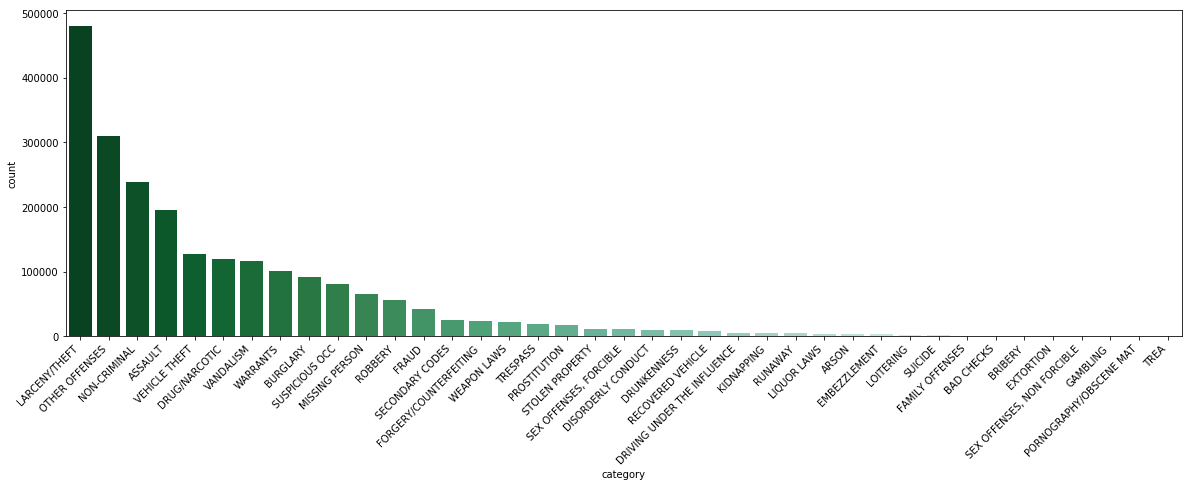

In [0]:
# Visualize Result
import seaborn as sns
fig_dims = (20,6)
fig = plt.subplots(figsize=fig_dims)
spark_df_q1_plot = spark_df_q1.toPandas()
chart = sns.barplot(x = 'category', y = 'count', palette= 'BuGn_r',data = spark_df_q1_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

####Q1_Insight: According to the number of crimes, we can classify crime category into three groups based on the above-mentioned graphs and tables: high crime rate, medium crime rate, and low crime rate.

#### Q2: 
Counts the number of crimes for different district, and visualize your results.

In [0]:
# sql way
spark_sql_q2 = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(spark_sql_q2)

PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


In [0]:
# df way
spark_df_q2 = df_opt1.groupBy('PdDistrict').count().orderBy('Count', ascending=False)
display(spark_df_q2)

PdDistrict,count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


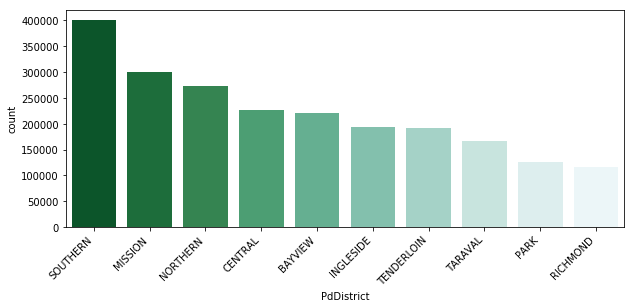

In [0]:
# Visualize Result
fig_dims = (10,4)
fig = plt.subplots(figsize=fig_dims)
spark_df_q2_plot = spark_df_q2.toPandas()
chart = sns.barplot(x = 'PdDistrict', y = 'count', palette= 'BuGn_r',data = spark_df_q2_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Q3: 
Count the number of crimes each "Sunday" at "SF downtown". <br>
hint 1: SF downtown is defiend via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

hint 2: SF downtown 物理范围可以是 rectangle a < x < b and c < y < d. thus, San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and represents each. So we assume SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740). 也可以是中心一个圈，距离小于多少算做downtown

In [0]:
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403404791479,37.775420706711,POINT (-122.403404791479 37.775420706711)
150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.48560378101,37.7388214326705,POINT (-122.48560378101 37.7388214326705)
140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535107224,37.7106603302503,POINT (-122.396535107224 37.7106603302503)
150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400130573297,37.7300925390327,POINT (-122.400130573297 37.7300925390327)
040753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.5,90,POINT (-120.5 90)
040855122,SUICIDE,SUICIDE BY JUMPING,Tuesday,07/27/2004,15:19,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.386667033903 37.7898821569191)
066085191,NON-CRIMINAL,LOST PROPERTY,Sunday,11/19/2006,17:45,BAYVIEW,NONE,0 Block of GIANTS DR,-122.38750147945,37.716878646429,POINT (-122.38750147945 37.716878646429)
050908404,VEHICLE THEFT,STOLEN AUTOMOBILE,Saturday,08/13/2005,17:00,TENDERLOIN,NONE,JENNINGS CT / INGALLS ST,-120.5,90,POINT (-120.5 90)
090768064,ARSON,ARSON OF A VEHICLE,Tuesday,07/28/2009,23:26,BAYVIEW,NONE,SELBY ST / OAKDALE AV,-122.399686082806,37.739901780585,POINT (-122.399686082806 37.739901780585)
111027676,ASSAULT,BATTERY,Saturday,12/24/2011,07:00,SOUTHERN,NONE,0 Block of DORE ST,-122.412933062384,37.7739274524819,POINT (-122.412933062384 37.7739274524819)


In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
# add new columns to convert Date to date format
df_new = df_opt2.withColumn("IncidentDate",to_date(df_opt2.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
display(df_new.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403404791479,37.775420706711,POINT (-122.403404791479 37.775420706711),2014-09-23,9,2014
150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.48560378101,37.7388214326705,POINT (-122.48560378101 37.7388214326705),2015-01-15,1,2015
140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535107224,37.7106603302503,POINT (-122.396535107224 37.7106603302503),2014-07-30,7,2014
150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400130573297,37.7300925390327,POINT (-122.400130573297 37.7300925390327),2015-05-02,5,2015
040753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.5,90,POINT (-120.5 90),2004-07-02,7,2004


In [0]:
# df way
sf_downtown = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540 )
spark_df_q3 = df_new.filter((df_new.DayOfWeek == "Sunday") & (sf_downtown)).groupby('IncidentDate','DayOfWeek').count().orderBy('IncidentDate')

In [0]:
# sql way
spark_sql_q3 = spark.sql("SELECT IncidentDate, DayOfWeek, COUNT(*) AS Count FROM sf_crime WHERE DayOfWeek = 'Sunday' \
                          AND X > -122.4313 AND X < -122.4213 AND Y > 37.7540 AND Y < 37.7740 \
                          GROUP BY IncidentDate, DayOfWeek ORDER BY IncidentDate")
#display(spark_sql_q3)

In [0]:
display(spark_df_q3)

IncidentDate,DayOfWeek,count
2003-01-05,Sunday,14
2003-01-12,Sunday,20
2003-01-19,Sunday,17
2003-01-26,Sunday,13
2003-02-02,Sunday,14
2003-02-09,Sunday,22
2003-02-16,Sunday,13
2003-02-23,Sunday,14
2003-03-02,Sunday,16
2003-03-09,Sunday,8


#### Q4: 
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

###### Q4_Spark Dataframe Way

In [0]:
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.Year.isin(years)]
display(df_years.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.48560378101,37.7388214326705,POINT (-122.48560378101 37.7388214326705),2015-01-15,1,2015
150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400130573297,37.7300925390327,POINT (-122.400130573297 37.7300925390327),2015-05-02,5,2015
180210729,ASSAULT,BATTERY,Tuesday,03/20/2018,18:20,NORTHERN,NONE,POST ST / GOUGH ST,-122.42485988902867,37.78619644725339,POINT (-122.42485988902867 37.78619644725339),2018-03-20,3,2018
160452270,ASSAULT,BATTERY,Friday,06/03/2016,00:15,TARAVAL,NONE,0 Block of FUENTE AV,-122.47813089080685,37.71940181416355,POINT (-122.47813089080685 37.71940181416355),2016-06-03,6,2016
150103687,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,Tuesday,02/03/2015,10:30,INGLESIDE,"ARREST, BOOKED",200 Block of PUTNAM ST,-122.411123069982,37.7363322364486,POINT (-122.411123069982 37.7363322364486),2015-02-03,2,2015


In [0]:
spark_df_q4 = df_years.groupby(['Year', 'Month']).count().orderBy('Year','Month')
display(spark_df_q4)

Year,Month,count
2015,1,13606
2015,2,12329
2015,3,13929
2015,4,12959
2015,5,13729
2015,6,13304
2015,7,13365
2015,8,13730
2015,9,12896
2015,10,13147


In [0]:
%sql select distinct(category) as type, count(*) as Count, year from sf_crime where Year in (2015, 2016, 2017, 2018) group by 1,3 order by 2 desc

type,Count,year
LARCENY/THEFT,47826,2017
LARCENY/THEFT,42068,2015
LARCENY/THEFT,40449,2016
OTHER OFFENSES,20382,2015
OTHER OFFENSES,19689,2016
NON-CRIMINAL,19177,2015
OTHER OFFENSES,18316,2017
NON-CRIMINAL,17919,2016
NON-CRIMINAL,17368,2017
ASSAULT,13655,2017


####Q4_Business Impact: 
* It is very obvious from the above figure that the crime rate from 2015 to 2017 is very high, especially the theft crime, and there has been a downward trend in 2018, especially in May.
* The crime rate has been so high since 2015, it may be because of the 47th Act signed by the governor in the California referendum in 2014, which led to a large number of theft and robbery crimes.
* Through online research, the reason for the decline in crime rate since 2018 may be that the San Francisco Police Department has increased uniformed police patrols, hence violence and theft activities have been greatly reduced. In addition, the San Francisco Police Department stepped up its crackdown on the drug trade, which is also one of the reasons for the decline in crime rate.

######Q4_Spark_SQL_Way

In [0]:
df_opt2.createOrReplaceTempView('sf_crime')

In [0]:
spark_sql_q4 = spark.sql("""
                       SELECT SUBSTRING(Date,1,2) AS Month, SUBSTRING(Date,7,4) AS Year, COUNT(*) AS Count
                       FROM sf_crime
                       GROUP BY Year, Month
                       HAVING Year in (2015, 2016, 2017, 2018) 
                       ORDER BY Year, Month
                       """)
display(spark_sql_q4)

Month,Year,Count
01,2015,13606
02,2015,12329
03,2015,13929
04,2015,12959
05,2015,13729
06,2015,13304
07,2015,13365
08,2015,13730
09,2015,12896
10,2015,13147


####Q5: 
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
from pyspark.sql.functions import to_timestamp
# add new columns to convert Time to hour format
df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'],'HH:mm')) 
# extract hour from incident time
df_new1 = df_new1.withColumn('Hour',hour(df_new1['IncidentTime']))
display(df_new1.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year,IncidentTime,Hour
146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403404791479,37.775420706711,POINT (-122.403404791479 37.775420706711),2014-09-23,9,2014,1970-01-01T01:00:00.000+0000,1
150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.48560378101,37.7388214326705,POINT (-122.48560378101 37.7388214326705),2015-01-15,1,2015,1970-01-01T17:00:00.000+0000,17
140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535107224,37.7106603302503,POINT (-122.396535107224 37.7106603302503),2014-07-30,7,2014,1970-01-01T09:32:00.000+0000,9
150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400130573297,37.7300925390327,POINT (-122.400130573297 37.7300925390327),2015-05-02,5,2015,1970-01-01T23:10:00.000+0000,23
040753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.5,90,POINT (-120.5 90),2004-07-02,7,2004,1970-01-01T13:43:00.000+0000,13


In [0]:
dates = ['12/15/2015','12/15/2016','12/15/2017']
df_days = df_new1[df_new1.Date.isin(dates)]
spark_df_q5_1 = df_days.groupby('Hour','Date').count().orderBy('Date','Hour')
display(spark_df_q5_1)

Hour,Date,count
0,12/15/2015,15
1,12/15/2015,6
2,12/15/2015,5
3,12/15/2015,4
4,12/15/2015,10
5,12/15/2015,3
6,12/15/2015,4
7,12/15/2015,8
8,12/15/2015,12
9,12/15/2015,10


#### Q5_Travel Suggestion
It can be clearly seen from the above figure that there are two peak periods of crime, 12 o'clock and 18 o'clock. This time period is the time for tourists to eat and rest. So remind visitors not to relax their vigilance while resting.

#### Q6: 
(1) Step1: Find out the top-3 danger disrict<br>
(2) Step2: Find out the crime event w.r.t category and time (hour) from the result of step 1<br>
(3) give your advice to distribute the police based on your analysis results.

###### Step1: Find out the top-3 danger district

In [0]:
#df way
spark_df_q6_s1 = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False)
display(spark_df_q6_s1)

PdDistrict,count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


In [0]:
top3_danger = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False).head(3)
top3_danger_district = [top3_danger[i][0] for i in range(3)]
top3_danger_district

Out[107]: ['SOUTHERN', 'MISSION', 'NORTHERN']

In [0]:
#sql way
spark_sql_q6_s1 = spark.sql( """
                             SELECT PdDistrict, COUNT(*) as Count
                             FROM sf_crime
                             GROUP BY 1
                             ORDER BY 2 DESC
                             LIMIT 3 
                             """ )
display(spark_sql_q6_s1)

PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713


###### Step2: Find out the crime event w.r.t category and time (hour) from the result of step 1

In [0]:
# df way
spark_df_q6_s2 = df_new1.filter(df_new1.PdDistrict.isin('SOUTHERN', 'MISSION', 'NORTHERN')).groupby('Category','Hour').count().orderBy('Category','Hour')
display(spark_df_q6_s2)

Category,Hour,count
ARSON,0,84
ARSON,1,77
ARSON,2,84
ARSON,3,95
ARSON,4,74
ARSON,5,60
ARSON,6,50
ARSON,7,29
ARSON,8,35
ARSON,9,28


#### Q6_Advice
* According to step1, the three most dangerous districts are SOUTHERN, MISSION and NORTHERN.
* We can see from the picture above that among the top three dangerous streets, the crime rate around 5 am is the lowest, and the high incidence of crime rate is around 12pm and 18pm, especially pay attention to theft, so I recommend to increase police patrol during that periods.

#### Q7:
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
%sql select distinct(resolution) as resolve from sf_crime

resolve
JUVENILE BOOKED
EXCEPTIONAL CLEARANCE
"ARREST, BOOKED"
CLEARED-CONTACT JUVENILE FOR MORE INFO
PROSECUTED FOR LESSER OFFENSE
LOCATED
UNFOUNDED
DISTRICT ATTORNEY REFUSES TO PROSECUTE
JUVENILE ADMONISHED
PSYCHOPATHIC CASE


In [0]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window
resolution_func = udf (lambda x: x != 'NONE')
spark_df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
spark_df_q7 = spark_df_q7.groupBy('category', 'Resolution', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
spark_df_q7 = spark_df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(spark_df_q7.IsResolution == True).orderBy('percentage%', ascending=False)
display(spark_df_q7)

category,Resolution,IsResolution,resolved,total,percentage%
WARRANTS,"ARREST, BOOKED",true,93092,101379,91.82572327602364
DRIVING UNDER THE INFLUENCE,"ARREST, BOOKED",true,4941,5672,87.11212976022567
DRUG/NARCOTIC,"ARREST, BOOKED",true,97961,119628,81.888019527201
STOLEN PROPERTY,"ARREST, BOOKED",true,9693,11891,81.51543183920612
DRUNKENNESS,"ARREST, BOOKED",true,7471,9826,76.03297374313047
WEAPON LAWS,"ARREST, BOOKED",true,13334,22234,59.971215255914366
LOITERING,"ARREST, CITED",true,1432,2430,58.93004115226338
PROSTITUTION,"ARREST, CITED",true,9667,16701,57.88276151128675
RUNAWAY,LOCATED,true,2434,4440,54.81981981981982
BRIBERY,"ARREST, BOOKED",true,418,813,51.41451414514145


In [0]:
display(spark_df_q7)

category,Resolution,IsResolution,resolved,total,percentage%
WARRANTS,"ARREST, BOOKED",true,93092,101379,91.82572327602364
DRIVING UNDER THE INFLUENCE,"ARREST, BOOKED",true,4941,5672,87.11212976022567
DRUG/NARCOTIC,"ARREST, BOOKED",true,97961,119628,81.888019527201
STOLEN PROPERTY,"ARREST, BOOKED",true,9693,11891,81.51543183920612
DRUNKENNESS,"ARREST, BOOKED",true,7471,9826,76.03297374313047
WEAPON LAWS,"ARREST, BOOKED",true,13334,22234,59.971215255914366
LOITERING,"ARREST, CITED",true,1432,2430,58.93004115226338
PROSTITUTION,"ARREST, CITED",true,9667,16701,57.88276151128675
RUNAWAY,LOCATED,true,2434,4440,54.81981981981982
BRIBERY,"ARREST, BOOKED",true,418,813,51.41451414514145


In [0]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window
resolution_func = udf (lambda x: x != 'NONE')
spark_df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
spark_df_q7 = spark_df_q7.groupBy('category', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
spark_df_q7 = spark_df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(spark_df_q7.IsResolution == True).orderBy('percentage%', ascending=False)

display(spark_df_q7)

category,IsResolution,resolved,total,percentage%
PROSTITUTION,true,15851,16701,94.91048440213162
WARRANTS,true,95897,101379,94.5925684806518
DRIVING UNDER THE INFLUENCE,true,5355,5672,94.4111424541608
DRUG/NARCOTIC,true,109357,119628,91.41421740729595
LIQUOR LAWS,true,3632,4083,88.95420034288513
STOLEN PROPERTY,true,10452,11891,87.89841056261038
LOITERING,true,2131,2430,87.6954732510288
DRUNKENNESS,true,8101,9826,82.44453490738856
WEAPON LAWS,true,16164,22234,72.69946928128093
OTHER OFFENSES,true,221514,309358,71.60441947517116


######Q7_Summary
* The top four categories of crimes resolved are PROSTITUTION, WARRANTS, DRIVING UNDER THE INFLUENCE, DRUG/NARCOTIC.
* The categories which less than 10% of crimes resolved are RECOVERED VEHICLE, VEHICLE THEFT, and LARCENY/THEFT.
* Can increase the police force against theft crimes.

####Conclusion
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big data analysis.
Point 1: what is your story ? and why you do this work ?
Point 2: how can you do it ? keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,
Point 3: what do you learn from the data ? keywords: crime, trend, advising, conclusion, runtime